In [2]:
import openpyxl
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from DE import DifferentialEvolution
from PSO import ParticleSwarmOptimization
from sklearn.model_selection import train_test_split

path = Path('main.ipynb').parent.resolve()

In [16]:
def plot_fitness(data):
    fitness = data['fit']
    best_fitness = [max(iteration) for iteration in fitness]
    plt.plot(range(1, len(best_fitness) + 1), best_fitness)
    plt.xlabel('Iteration')
    plt.ylabel('Best fitness')
    plt.title('Evolution best of fitness')
    plt.grid(True)
    plt.show()

In [4]:
wb = openpyxl.load_workbook('TestRegData.xlsx')
sheet = wb['Var4']
temp = [col[1:] for col in sheet.iter_cols(values_only=True)]
x_data = temp[:-1]
y_data = temp[-1]
wb.close()

x = np.array(x_data).T
y = np.array(y_data)
print(f'Shape of x / y: {x.shape} / {y.shape}')

Shape of x / y: (745, 10) / (745,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
data = (X_train, y_train)
print(f'Shape of X_train / y_train: {X_train.shape} / {y_train.shape}')
print(f'Shape of X_test / y_test: {X_test.shape} / {y_test.shape}')

Shape of X_train / y_train: (558, 10) / (558,)
Shape of X_test / y_test: (187, 10) / (187,)


In [19]:
def L1(a, x, y, coef=0.0005):
    return sum([(y[i] - (a[0]+sum([a[j]*x[i][j] for j in range(1, len(a))])))**2 + coef*sum([abs(a[i]) for i in range(len(a))]) for i in range(1, len(x))])

def L2(a, x, y, coef=0.0005):
    return sum([(y[i] - (a[0]+sum([a[j]*x[i][j] for j in range(1, len(a))])))**2 + coef*sum([a[i]**2 for i in range(len(a))]) for i in range(1, len(x))])

def ElasticnNets(a, x, y, coef1=0.0005, coef2=0.0005):
    fisrt_term  = coef1 * sum([a[i]**2 for i in range(len(a))])
    second_term = coef2 * sum([abs(a[i]) for i in range(len(a))])
    return sum([(y[i] - (a[0]+sum([a[j]*x[i][j] for j in range(1, len(a))])))**2 + fisrt_term + second_term for i in range(1, len(x))])

### Метод диференціальної еволюції

Best solution: [-4.94706424  5.          0.99563855 -2.00539064 -3.99115632 -5.
 -4.00723721  3.00169777 -2.00067035 -3.99568035]
Best fitness: 10.185447841436778


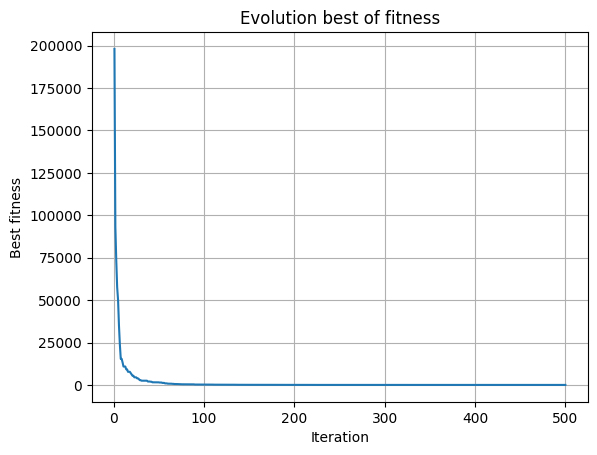

In [21]:
bounds = np.array([[-5, 5] for _ in range(10)])
de = DifferentialEvolution(L1, bounds, data, max_iter=500)

best_solution, best_fitness = de.optimize()
print('Best solution:', best_solution)
print('Best fitness:', best_fitness)

plot_fitness(de.param)

Best solution: [-4.90252172  4.94282334  0.98253004 -2.00702747 -3.98039383 -4.97559017
 -4.00500778  2.96368292 -2.00978131 -3.99604877]
Best fitness: 39.41115489073175


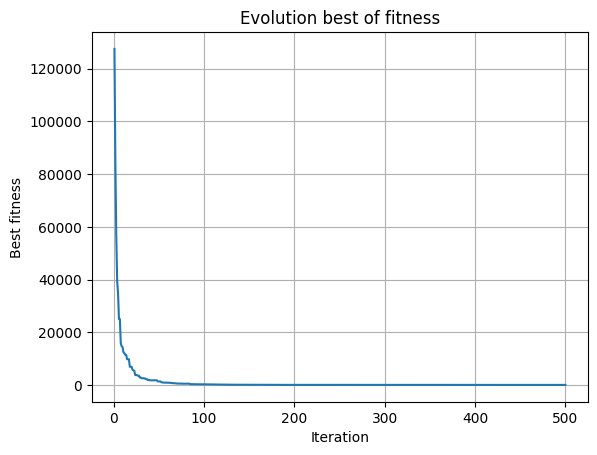

In [22]:
bounds = np.array([[-5, 5] for _ in range(10)])
de = DifferentialEvolution(L2, bounds, data, max_iter=500)

best_solution, best_fitness = de.optimize()
print('Best solution:', best_solution)
print('Best fitness:', best_fitness)

plot_fitness(de.param)

Best solution: [-4.91526798  4.952706    0.97572806 -2.00935626 -3.98502826 -4.98234355
 -3.99269888  2.96418565 -1.99995309 -3.98398555]
Best fitness: 49.091087409554724


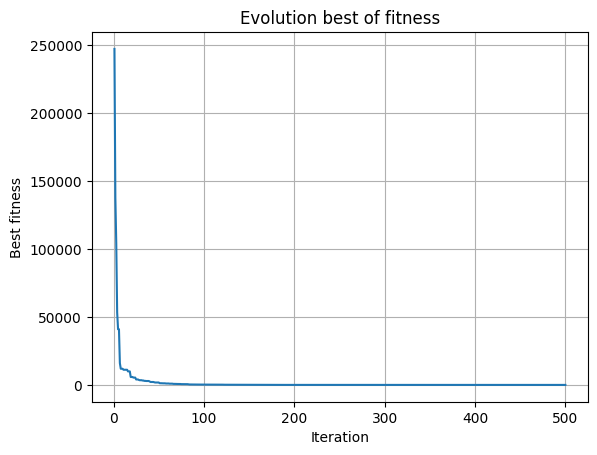

In [23]:
bounds = np.array([[-5, 5] for _ in range(10)])
de = DifferentialEvolution(ElasticnNets, bounds, data, max_iter=500)

best_solution, best_fitness = de.optimize()
print('Best solution:', best_solution)
print('Best fitness:', best_fitness)

plot_fitness(de.param)

### Алгоритм оптимізації роєм частинок

Best solution: [-4.91526798  4.952706    0.97572806 -2.00935626 -3.98502826 -4.98234355
 -3.99269888  2.96418565 -1.99995309 -3.98398555]
Best fitness: 292.5778959910088


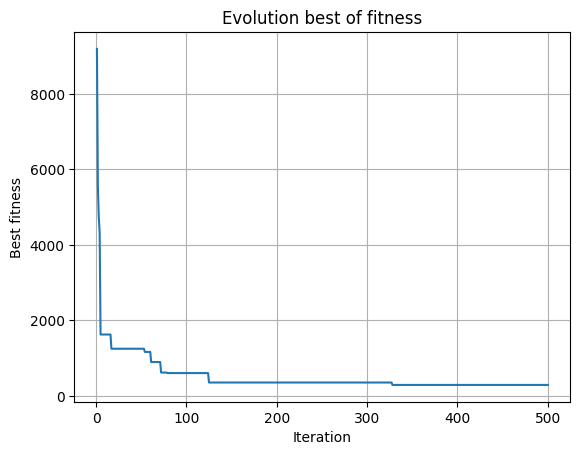

In [29]:
bounds = np.array([[-5, 5] for _ in range(10)])
pso = ParticleSwarmOptimization(L1, bounds, data, max_iter=500)
best_params, best_fitness = pso.optimize()

print('Best solution:', best_solution)
print('Best fitness:', best_fitness)
plot_fitness(pso.param)

Best solution: [-4.91526798  4.952706    0.97572806 -2.00935626 -3.98502826 -4.98234355
 -3.99269888  2.96418565 -1.99995309 -3.98398555]
Best fitness: 208.52859514719646


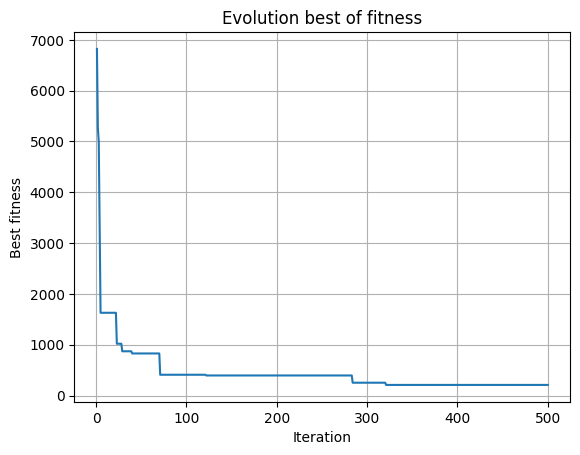

In [30]:
bounds = np.array([[-5, 5] for _ in range(10)])
pso = ParticleSwarmOptimization(L2, bounds, data, max_iter=500)
best_params, best_fitness = pso.optimize()

print('Best solution:', best_solution)
print('Best fitness:', best_fitness)
plot_fitness(pso.param)

Best solution: [-4.91526798  4.952706    0.97572806 -2.00935626 -3.98502826 -4.98234355
 -3.99269888  2.96418565 -1.99995309 -3.98398555]
Best fitness: 258.61734456001756


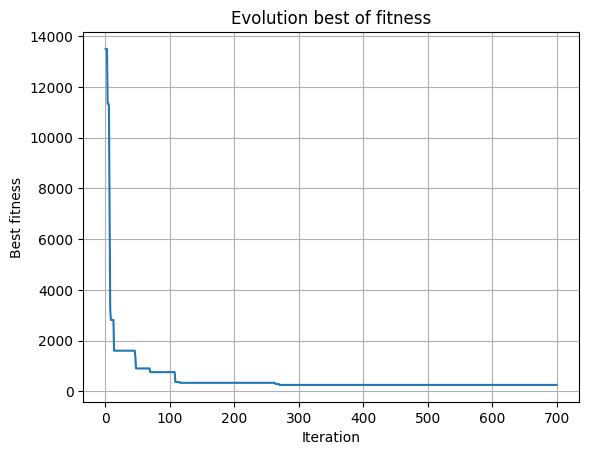

In [31]:
bounds = np.array([[-5, 5] for _ in range(10)])
pso = ParticleSwarmOptimization(ElasticnNets, bounds, data, max_iter=700)
best_params, best_fitness = pso.optimize()

print('Best solution:', best_solution)
print('Best fitness:', best_fitness)
plot_fitness(pso.param)

### Boston_housing

In [32]:
wb = openpyxl.load_workbook('boston_housing.xlsx')
sheet = wb['boston_housing']
temp = [col[1:] for col in sheet.iter_cols(values_only=True)]
x_data = temp[:-1]
y_data = temp[-1]
wb.close()

x = np.array(x_data).T
y = np.array(y_data)
print(f'Shape of x / y: {x.shape} / {y.shape}')

Shape of x / y: (506, 104) / (506,)


In [33]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
data = (X_train, y_train)
print(f'Shape of X_train / y_train: {X_train.shape} / {y_train.shape}')
print(f'Shape of X_test / y_test: {X_test.shape} / {y_test.shape}')

Shape of X_train / y_train: (379, 104) / (379,)
Shape of X_test / y_test: (127, 104) / (127,)


#### Метод диференціальної еволюції

Best solution: [ 4.85265863  5.         -1.25593243  0.03687371  1.09775636  5.
  5.         -5.          3.30647165 -5.          1.84940747  5.
  2.37371879 -5.         -2.80679241 -1.67557755  5.         -0.57639716
  4.83735261 -4.39695912  3.         -0.76249493  5.         -0.4133999
  5.         -2.09080492  4.96408977 -2.57560677  1.3564722   5.
 -1.2984475  -5.          5.         -3.71507182  1.0515391   3.
  0.44203864  0.67738009  1.39857674  5.          5.          2.39493471
  5.          3.0820122   5.          5.         -5.         -5.
  2.3985963   5.         -5.         -2.01231944 -5.         -0.16071766
  5.         -5.         -3.19019116  5.         -5.         -3.38284447
 -0.61845422 -5.          1.09290668  5.          2.12452339 -1.64123309
 -0.85669696 -3.98352895  5.          4.84083305  2.58736144 -3.58293505
  5.          0.04062848  5.         -5.          3.45150304  0.96302631
  0.78794426  1.76274477 -3.8400567  -1.51052273 -5.         -1.9933587
  0.8

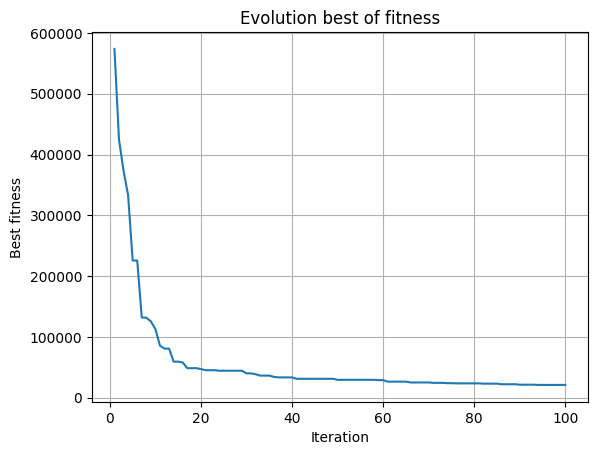

In [35]:
bounds = np.array([[-5, 5] for _ in range(104)])
de = DifferentialEvolution(L1, bounds, data, pop_size=104, max_iter=100)

best_solution, best_fitness = de.optimize()
print('Best solution:', best_solution)
print('Best fitness:', best_fitness)

plot_fitness(de.param)

Best solution: [ 4.09509778  3.41217049  4.44482906  1.25060144  1.82246836  5.
  5.          5.          2.86219346  1.2796863   5.          5.
 -2.19675723  3.16638187 -5.          1.65673434 -5.          4.59657632
 -5.          5.         -2.26352452  0.49926394  5.         -3.1545981
 -5.         -5.         -4.97067774  5.          4.78203323 -2.84170776
  0.89624259  2.26441329  4.53692382 -1.6022016   5.          1.8678493
 -0.31661907  1.30984625  5.         -5.          3.          4.45168833
 -2.3297462  -4.42771238 -5.         -4.44547937  3.42006121 -5.
 -5.         -5.         -2.27816635 -0.94554196  4.11378945  5.
  3.0387675   5.         -5.          3.         -2.77283883 -2.44733213
  5.          0.77661213  5.         -5.         -1.37211914 -5.
  2.87059793 -2.54932797  4.95293427  3.91817617  1.88005094  1.29341287
  1.32620689  5.          5.         -5.          4.3335814  -5.
  5.         -5.         -4.02262526 -3.67090443 -2.9884482  -5.
  0.801184    2.47586

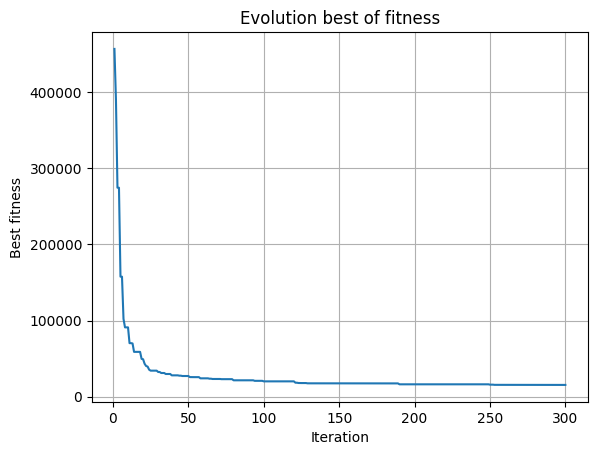

In [37]:
bounds = np.array([[-5, 5] for _ in range(104)])
de = DifferentialEvolution(L2, bounds, data, max_iter=300)

best_solution, best_fitness = de.optimize()
print('Best solution:', best_solution)
print('Best fitness:', best_fitness)

plot_fitness(de.param)

Best solution: [ 5.          4.04458838  2.66453041 -5.          5.          4.57848171
  2.00192444  2.0678412   0.00947204  5.          5.          4.68081187
 -2.05745272  3.16316852 -5.         -5.          5.         -5.
 -5.         -5.         -2.35199135  5.         -5.         -5.
  4.24197906 -5.          5.          5.          5.          2.09216855
  5.         -5.         -1.63386632 -1.2744248  -3.79493284 -5.
  2.54745184  5.         -2.1586341  -5.          5.          5.
  5.          5.         -5.          1.69607605 -5.         -5.
 -4.97808371  5.         -4.21099782  5.          1.99149228 -3.
  0.77775783 -1.27670164 -2.57819623  5.         -5.         -2.53641247
  5.         -4.87867636  4.42104847 -5.         -5.         -5.
 -0.39696374  5.          5.          2.37837688  0.72613342  5.
 -5.          3.04068679  4.55048643 -5.          2.90780988  5.
  5.         -3.90320649 -4.0488336  -0.75864633 -5.         -5.
  5.         -0.35365412 -3.94263084 -5.   

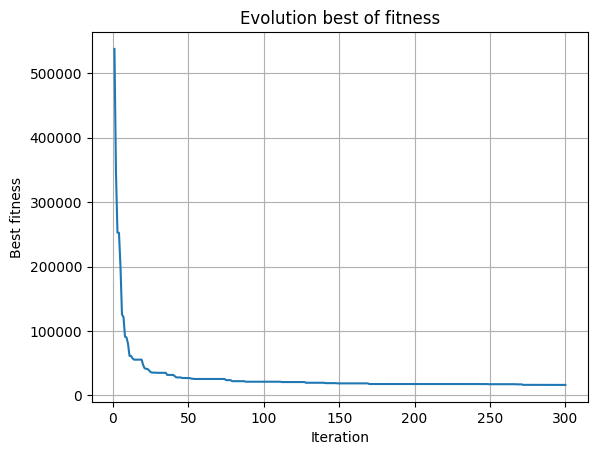

In [38]:
bounds = np.array([[-5, 5] for _ in range(104)])
de = DifferentialEvolution(ElasticnNets, bounds, data, max_iter=300)

best_solution, best_fitness = de.optimize()
print('Best solution:', best_solution)
print('Best fitness:', best_fitness)

plot_fitness(de.param)

#### Алгоритм оптимізації роєм частинок

Best solution: [ 5.          4.04458838  2.66453041 -5.          5.          4.57848171
  2.00192444  2.0678412   0.00947204  5.          5.          4.68081187
 -2.05745272  3.16316852 -5.         -5.          5.         -5.
 -5.         -5.         -2.35199135  5.         -5.         -5.
  4.24197906 -5.          5.          5.          5.          2.09216855
  5.         -5.         -1.63386632 -1.2744248  -3.79493284 -5.
  2.54745184  5.         -2.1586341  -5.          5.          5.
  5.          5.         -5.          1.69607605 -5.         -5.
 -4.97808371  5.         -4.21099782  5.          1.99149228 -3.
  0.77775783 -1.27670164 -2.57819623  5.         -5.         -2.53641247
  5.         -4.87867636  4.42104847 -5.         -5.         -5.
 -0.39696374  5.          5.          2.37837688  0.72613342  5.
 -5.          3.04068679  4.55048643 -5.          2.90780988  5.
  5.         -3.90320649 -4.0488336  -0.75864633 -5.         -5.
  5.         -0.35365412 -3.94263084 -5.   

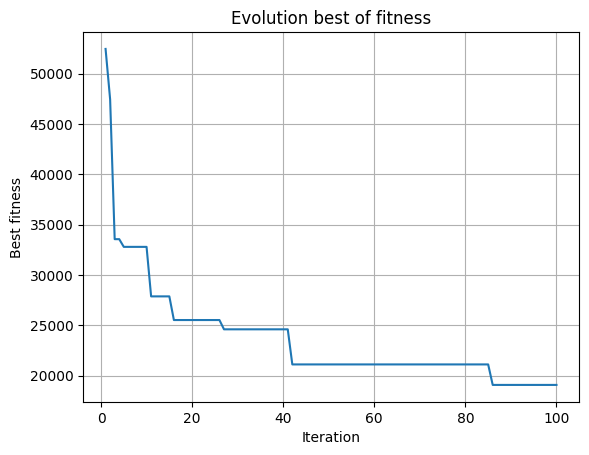

In [39]:
bounds = np.array([[-5, 5] for _ in range(104)])
pso = ParticleSwarmOptimization(L1, bounds, data, num_particles=104, max_iter=100)
best_params, best_fitness = pso.optimize()

print('Best solution:', best_solution)
print('Best fitness:', best_fitness)
plot_fitness(pso.param)

Best solution: [ 5.          4.04458838  2.66453041 -5.          5.          4.57848171
  2.00192444  2.0678412   0.00947204  5.          5.          4.68081187
 -2.05745272  3.16316852 -5.         -5.          5.         -5.
 -5.         -5.         -2.35199135  5.         -5.         -5.
  4.24197906 -5.          5.          5.          5.          2.09216855
  5.         -5.         -1.63386632 -1.2744248  -3.79493284 -5.
  2.54745184  5.         -2.1586341  -5.          5.          5.
  5.          5.         -5.          1.69607605 -5.         -5.
 -4.97808371  5.         -4.21099782  5.          1.99149228 -3.
  0.77775783 -1.27670164 -2.57819623  5.         -5.         -2.53641247
  5.         -4.87867636  4.42104847 -5.         -5.         -5.
 -0.39696374  5.          5.          2.37837688  0.72613342  5.
 -5.          3.04068679  4.55048643 -5.          2.90780988  5.
  5.         -3.90320649 -4.0488336  -0.75864633 -5.         -5.
  5.         -0.35365412 -3.94263084 -5.   

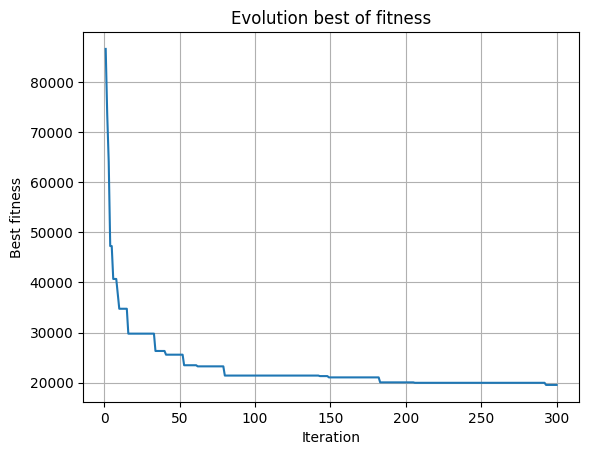

In [40]:
bounds = np.array([[-5, 5] for _ in range(104)])
pso = ParticleSwarmOptimization(L2, bounds, data, max_iter=300)
best_params, best_fitness = pso.optimize()

print('Best solution:', best_solution)
print('Best fitness:', best_fitness)
plot_fitness(pso.param)

Best solution: [ 5.          4.04458838  2.66453041 -5.          5.          4.57848171
  2.00192444  2.0678412   0.00947204  5.          5.          4.68081187
 -2.05745272  3.16316852 -5.         -5.          5.         -5.
 -5.         -5.         -2.35199135  5.         -5.         -5.
  4.24197906 -5.          5.          5.          5.          2.09216855
  5.         -5.         -1.63386632 -1.2744248  -3.79493284 -5.
  2.54745184  5.         -2.1586341  -5.          5.          5.
  5.          5.         -5.          1.69607605 -5.         -5.
 -4.97808371  5.         -4.21099782  5.          1.99149228 -3.
  0.77775783 -1.27670164 -2.57819623  5.         -5.         -2.53641247
  5.         -4.87867636  4.42104847 -5.         -5.         -5.
 -0.39696374  5.          5.          2.37837688  0.72613342  5.
 -5.          3.04068679  4.55048643 -5.          2.90780988  5.
  5.         -3.90320649 -4.0488336  -0.75864633 -5.         -5.
  5.         -0.35365412 -3.94263084 -5.   

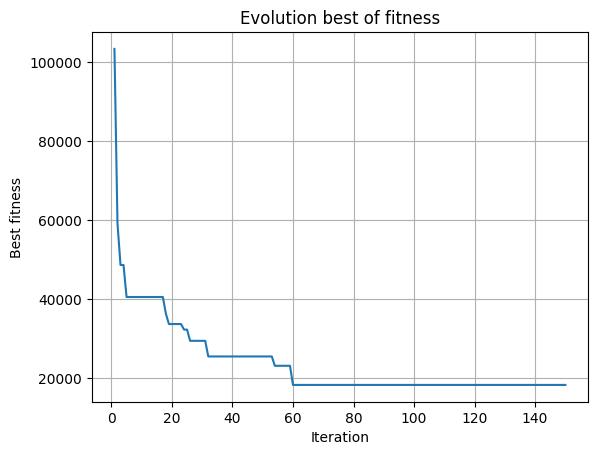

In [41]:
bounds = np.array([[-5, 5] for _ in range(104)])
pso = ParticleSwarmOptimization(ElasticnNets, bounds, data, max_iter=150)
best_params, best_fitness = pso.optimize()

print('Best solution:', best_solution)
print('Best fitness:', best_fitness)
plot_fitness(pso.param)